In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
from sklearn.preprocessing import MinMaxScaler


CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

# upload file using google colab
from google.colab import files
uploaded = files.upload()

Saving MetroFlow Simulations.csv to MetroFlow Simulations (1).csv


In [ ]:
df = pd.read_csv("MetroFlow Simulations.csv")

In [ ]:
df.head(n=5)

,Starting Train Capacity,Starting Stations Capacity,Arrival Rates Data,Headway,Active Trains,Result
0,0.0,0.0,7,4.0,23,No Overcrowding
1,0.0,0.0,7,5.0,23,No Overcrowding
2,0.0,0.0,7,7.0,23,No Overcrowding
3,0.0,0.0,7,8.0,23,No Overcrowding
4,0.0,0.0,7,4.0,20,No Overcrowding


In [ ]:
def show_numerical_statistics(col):
  print(col)

  mean = np.mean(df[col])
  min = np.min(df[col])
  max = np.max(df[col])
  std = np.std(df[col])
  median = np.median(df[col])

  data = {"Mean" : [mean], "Min" : [min], "Max" : [max], "Standard Deviation" : [std], "Median" : [median]}
  result = pd.DataFrame(data)
  display(result)

In [ ]:
show_numerical_statistics("Starting Train Capacity")
show_numerical_statistics("Starting Stations Capacity")
show_numerical_statistics("Arrival Rates Data")
show_numerical_statistics("Headway")
show_numerical_statistics("Active Trains")

Starting Train Capacity


,Mean,Min,Max,Standard Deviation,Median
0,0.636304,0.0,1.0,0.309132,0.75


Starting Stations Capacity


,Mean,Min,Max,Standard Deviation,Median
0,0.433696,0.0,0.75,0.288748,0.5


Arrival Rates Data


,Mean,Min,Max,Standard Deviation,Median
0,10.530435,7,14,3.499868,14.0


Headway


,Mean,Min,Max,Standard Deviation,Median
0,5.939217,3.67,8.0,1.603967,5.0


Active Trains


,Mean,Min,Max,Standard Deviation,Median
0,17.452174,12,23,4.30822,15.0


<ipython-input-135-b6002aafd428>:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overcrowding_count = [(df[df["Headway"] == 3.67])[df["Result"] == "Overcrowding"].shape[0] / df[df["Headway"] == 3.67].shape[0] * 100,
<ipython-input-135-b6002aafd428>:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (df[df["Headway"] == 4])[df["Result"] == "Overcrowding"].shape[0] / df[df["Headway"] == 4].shape[0] * 100,
<ipython-input-135-b6002aafd428>:56: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (df[df["Headway"] == 5])[df["Result"] == "Overcrowding"].shape[0] / df[df["Headway"] == 5].shape[0] * 100,
<ipython-input-135-b6002aafd428>:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  0, (df[df["Headway"] == 7])[df["Result"] == "Overcrowding"].shape[0] / df[df["Headway"] == 7].shape[0] * 100,
<ipython-input-135-b6002aafd428>:58: UserWarning: Boolean Series key will be rein

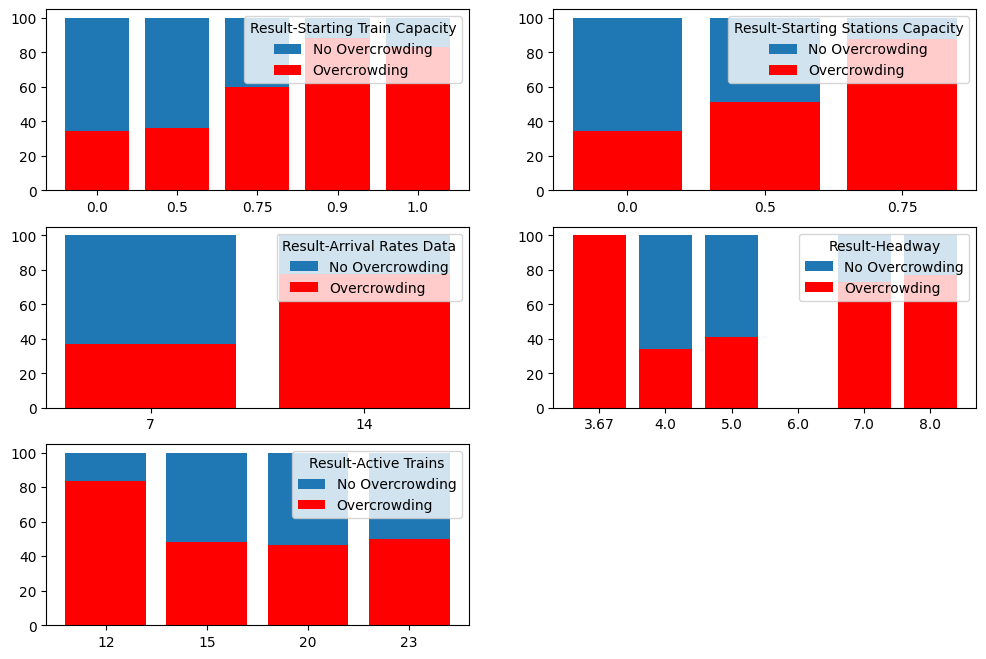

In [ ]:
fig, ((ax1, ax2),(ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(12,8))
#==================
starting_train_capacity = np.sort(df["Starting Train Capacity"].unique())
counts = []
overcrowding_count = []
x = np.arange(len(starting_train_capacity))
for capacity in starting_train_capacity:
   frame = df[df["Starting Train Capacity"] == capacity]
   counts.append(frame.shape[0])
   overcrowding_count.append((frame[frame["Result"] == "Overcrowding"]).shape[0] / frame.shape[0] * 100)

count_constant = np.full(len(starting_train_capacity), 100)
bar = ax1.bar(x, count_constant)
overlay_bar = ax1.bar(x, overcrowding_count, color="red")
ax1.set_xticks(x, starting_train_capacity)
ax1.legend([bar, overlay_bar], ["No Overcrowding", "Overcrowding"], title="Result-Starting Train Capacity", loc="upper right")
#==================
starting_stations_capacity = np.sort(df["Starting Stations Capacity"].unique())
counts = []
overcrowding_count = []
x = np.arange(len(starting_stations_capacity))
for capacity in starting_stations_capacity:
   frame = df[df["Starting Stations Capacity"] == capacity]
   counts.append(frame.shape[0])
   overcrowding_count.append((frame[frame["Result"] == "Overcrowding"]).shape[0] / frame.shape[0] * 100)

count_constant = np.full(len(starting_stations_capacity), 100)
bar = ax2.bar(x, count_constant)
overlay_bar = ax2.bar(x, overcrowding_count, color="red")
ax2.set_xticks(x, starting_stations_capacity)
ax2.legend([bar, overlay_bar], ["No Overcrowding", "Overcrowding"], title="Result-Starting Stations Capacity", loc="upper right")
#==================
arrival_rates_data = np.sort(df["Arrival Rates Data"].unique())
counts = []
overcrowding_count = []
x = np.arange(len(arrival_rates_data))
for capacity in arrival_rates_data:
   frame = df[df["Arrival Rates Data"] == capacity]
   counts.append(frame.shape[0])
   overcrowding_count.append((frame[frame["Result"] == "Overcrowding"]).shape[0] / frame.shape[0] * 100)

count_constant = np.full(len(arrival_rates_data), 100)
bar = ax3.bar(x, count_constant)
overlay_bar = ax3.bar(x, overcrowding_count, color="red")
ax3.set_xticks(x, arrival_rates_data)
ax3.legend([bar, overlay_bar], ["No Overcrowding", "Overcrowding"], title="Result-Arrival Rates Data", loc="upper right")
#==================

headway = np.sort(np.append(df["Headway"].unique(), 6))
x = np.arange(len(headway))
counts = [df[df["Headway"] == 3.67].shape[0], df[df["Headway"] == 4].shape[0], df[df["Headway"] == 5].shape[0],
          0, df[df["Headway"] == 7].shape[0], df[df["Headway"] == 8].shape[0]]
count_constant = [100,100,100,0,100, 100]
overcrowding_count = [(df[df["Headway"] == 3.67])[df["Result"] == "Overcrowding"].shape[0] / df[df["Headway"] == 3.67].shape[0] * 100,
                      (df[df["Headway"] == 4])[df["Result"] == "Overcrowding"].shape[0] / df[df["Headway"] == 4].shape[0] * 100,
                      (df[df["Headway"] == 5])[df["Result"] == "Overcrowding"].shape[0] / df[df["Headway"] == 5].shape[0] * 100,
                      0, (df[df["Headway"] == 7])[df["Result"] == "Overcrowding"].shape[0] / df[df["Headway"] == 7].shape[0] * 100,
                      (df[df["Headway"] == 8])[df["Result"] == "Overcrowding"].shape[0] / df[df["Headway"] == 8].shape[0] * 100]

bar = ax4.bar(x, count_constant)
overlay_bar = ax4.bar(x, overcrowding_count, color="red")
ax4.set_xticks(x, headway)
ax4.legend([bar, overlay_bar], ["No Overcrowding", "Overcrowding"], title="Result-Headway", loc="upper right")
#==================
active_trains = np.sort(df["Active Trains"].unique())
counts = []
overcrowding_count = []
x = np.arange(len(active_trains))
for capacity in active_trains:
   frame = df[df["Active Trains"] == capacity]
   counts.append(frame.shape[0])
   overcrowding_count.append((frame[frame["Result"] == "Overcrowding"]).shape[0] / frame.shape[0] * 100)

count_constant = np.full(len(active_trains), 100)
bar = ax5.bar(x, count_constant)
overlay_bar = ax5.bar(x, overcrowding_count, color="red")
ax5.set_xticks(x, active_trains)
ax5.legend([bar, overlay_bar], ["No Overcrowding", "Overcrowding"], title="Result-Active Trains", loc="upper right")
ax6.axis('off')
plt.show()

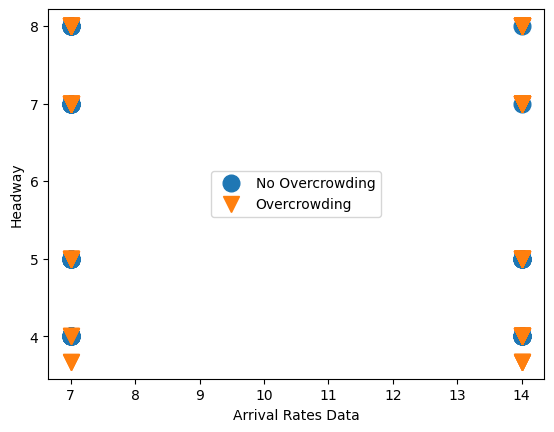

In [ ]:
groups = df.groupby('Result')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
i = 0
for name, group in groups:
  m = 'o'
  if i == 1:
    m = 'v'
  ax.plot(group["Arrival Rates Data"], group["Headway"], marker=m, linestyle='', ms=12, label=name)
  i = i+1

ax.set_xlabel("Arrival Rates Data")
ax.set_ylabel("Headway")
ax.legend(loc="center")

plt.show()

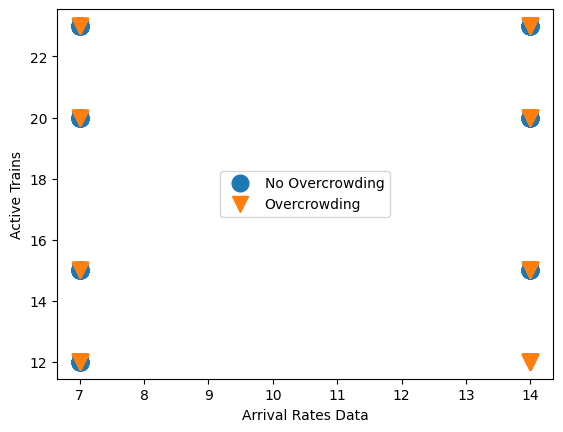

In [ ]:
groups = df.groupby('Result')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
i = 0
for name, group in groups:
  m = 'o'
  if i == 1:
    m = 'v'
  ax.plot(group["Arrival Rates Data"], group["Active Trains"], marker=m, linestyle='', ms=12, label=name)
  i = i+1

ax.set_xlabel("Arrival Rates Data")
ax.set_ylabel("Active Trains")
ax.legend(loc="center")

plt.show()

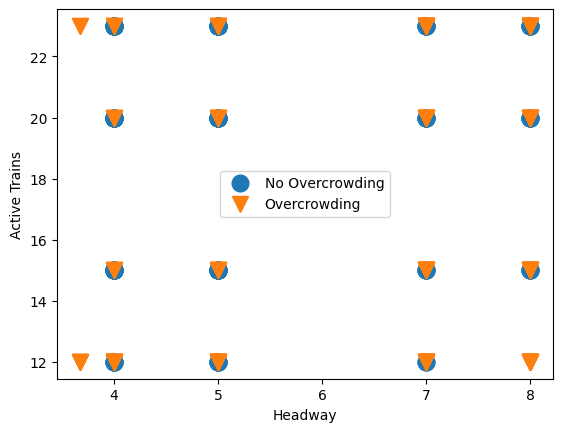

In [ ]:
groups = df.groupby('Result')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
i = 0
for name, group in groups:
  m = 'o'
  if i == 1:
    m = 'v'
  ax.plot(group["Headway"], group["Active Trains"], marker=m, linestyle='', ms=12, label=name)
  i = i+1

ax.set_xlabel("Headway")
ax.set_ylabel("Active Trains")
ax.legend(loc="center")

plt.show()

Overcrowding % for lower mins of Arrival Rates Data: 0.3684210526315789
Overcrowding % for higher mins of Arrival Rates Data: 0.7758620689655172


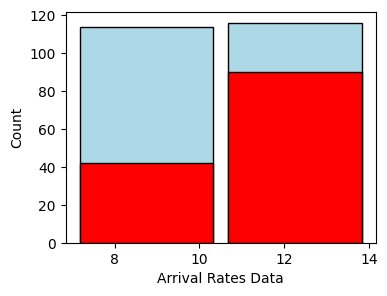

In [ ]:
plt.figure(figsize=(4,3))
plt.xlabel("Arrival Rates Data")
plt.ylabel("Count")
plt.hist(df["Arrival Rates Data"], color='lightblue', ec='black', bins=2, rwidth=0.9)
plt.hist((df[df["Result"] == "Overcrowding"])["Arrival Rates Data"], color='red', ec='black', bins=2, rwidth=0.9)

lower = df[df["Arrival Rates Data"] < 11]
higher = df[df["Arrival Rates Data"] >= 11]
print("Overcrowding % for lower mins of Arrival Rates Data:",lower[lower["Result"] == "Overcrowding"].shape[0]/lower.shape[0])
print("Overcrowding % for higher mins of Arrival Rates Data:",higher[higher["Result"] == "Overcrowding"].shape[0]/higher.shape[0])

Overcrowding % for lower mins of Headway: 0.4067796610169492
Overcrowding % for higher mins of Headway: 0.75


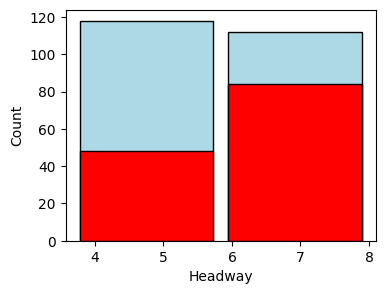

In [ ]:
plt.figure(figsize=(4,3))
plt.xlabel("Headway")
plt.ylabel("Count")
plt.hist(df["Headway"], color='lightblue', ec='black', bins=2, rwidth=0.9)
plt.hist((df[df["Result"] == "Overcrowding"])["Headway"], color='red', ec='black', bins=2, rwidth=0.9)

lower = df[df["Headway"] < 6]
higher = df[df["Headway"] >= 6]
print("Overcrowding % for lower mins of Headway:",lower[lower["Result"] == "Overcrowding"].shape[0]/lower.shape[0])
print("Overcrowding % for higher mins of Headway:",higher[higher["Result"] == "Overcrowding"].shape[0]/higher.shape[0])

Overcrowding % for lower # of Active Trains: 0.6637931034482759
Overcrowding % for higher # of Active Trains: 0.4824561403508772


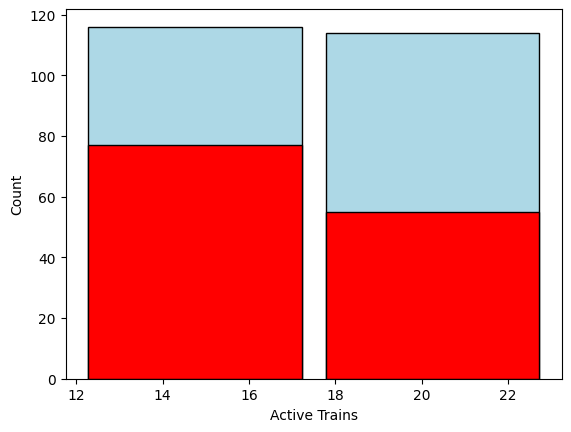

In [ ]:
plt.xlabel("Active Trains")
plt.ylabel("Count")
plt.hist(df["Active Trains"], color='lightblue', ec='black', bins=2, rwidth=0.9)
plt.hist((df[df["Result"] == "Overcrowding"])["Active Trains"], color='red', ec='black', bins=2, rwidth=0.9)

lower = df[df["Active Trains"] < 18]
higher = df[df["Active Trains"] >= 18]
print("Overcrowding % for lower # of Active Trains:",lower[lower["Result"] == "Overcrowding"].shape[0]/lower.shape[0])
print("Overcrowding % for higher # of Active Trains:",higher[higher["Result"] == "Overcrowding"].shape[0]/higher.shape[0])